In [1]:
%load_ext autoreload
%matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import sys
import clipboard
import numpy as np
import re
import os
from IPython.display import clear_output
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

In [2]:
%autoreload 2
from Logic.network_manager import NetworkManager
from Logic.meta_network import MetaNetworkManager
from Logic.generation_db_and_manager import *
from Logic.variations_creator import *
from Logic.bpy_connector import generate_image
from Logic.utils import compare_dicts, deep_unfreeze, show_image_grid

In [3]:
path = '/Users/orenm/BlenderShaderProject/data/'
images_path = os.path.join(path, 'images/')
db_path = os.path.join(path, 'DB/')

In [4]:
# db_manager = DBManager(db_path)

In [5]:
db_manager = DBManager.load(db_path)

In [6]:
len(db_manager.network)

62317

In [7]:
for i in range(150):  # mega nodes
    clear_output(wait=True)
    print(f'mega nodes :{i}')
    
    n_change_params = np.random.randint(3, 6)
    kwargs = {'max_layers': 1, 'n_additions': 1, 'n_change_params': n_change_params}
    concat_param_change = np.random.rand() < 0.3
    make_cluster(db_manager, mega_nodes, concat_param_change=concat_param_change, cluster_kwargs=kwargs)

for i in range(400):  # regular meta nodes
    clear_output(wait=True)
    print(f'regular meta nodes :{i}')
    
    max_layers = np.random.randint(1, 2)
    n_additions = np.random.randint(2, 3)
    n_change_params = np.random.randint(3, 6)
    kwargs = {'max_layers': max_layers, 'n_additions': n_additions, 'n_change_params': n_change_params}
    concat_param_change = np.random.rand() < 0.3
    make_cluster(db_manager, regular_meta_nodes, concat_param_change=concat_param_change, cluster_kwargs=kwargs)

for i in range(400):  # random nodes
    clear_output(wait=True)
    print(f'random nodes :{i}')
    
    n_additions = np.random.randint(3, 8)
    n_change_params = np.random.randint(4, 12)
    kwargs = {'n_additions': n_additions, 'n_change_params': n_change_params}
    concat_param_change = np.random.rand() < 0.3
    make_cluster(db_manager, completely_random_generation, concat_param_change=concat_param_change, cluster_kwargs=kwargs)

random nodes :399
Info: Deleted 3 data-block(s)


In [14]:
len(db_manager.network)

62317

In [ ]:
# loop counter must be a library

In [12]:
def get_legit_labels(db_manager):
    if np.random.rand() < 0.65:
        return db_manager.get_nodes_without_label(IS_EMPTY_NETWORK)
    return db_manager.get_nodes_with_label(IS_CLUSTER_BASE)

fail_msg = []

for i in range(8000):
    selected_variation_func = change_numeric
    n_changes = np.random.randint(1,5)
    
    legit_nodes = get_legit_labels(db_manager)
    selected_node = np.random.choice(legit_nodes)
    msg = make_variations(db_manager, selected_node, selected_variation_func, n_changes=n_changes})
    fail_msg.append(msg)

for i in range(4000):
    selected_variation_func = change_numeric
    n_changes = np.random.randint(1,5)
    param_names= ['Scale', 'element_0', 'element_1']
    
    # i think i want more variations on scale and on the color ramp values
    legit_nodes = get_legit_labels(db_manager)
    selected_node = np.random.choice(legit_nodes)
    msg = make_variations(db_manager, selected_node, selected_variation_func, n_changes=n_changes, param_names=param_names)
    fail_msg.append(msg)

for i in range(7000):
    selected_variation_func = change_params
    n_changes = np.random.randint(1,5)
    
    legit_nodes = get_legit_labels(db_manager)
    selected_node = np.random.choice(legit_nodes)
    msg = make_variations(db_manager, selected_node, selected_variation_func, n_changes=n_changes)
    fail_msg.append(msg)
    
for i in range(4000):
    structural_changes = [add_random_node_on_edge, add_random_edge, remove_random_edge, remove_random_node]
    selected_variation_func = np.random.choice(structural_changes)
    
    legit_nodes = get_legit_labels(db_manager)
    selected_node = np.random.choice(legit_nodes)
    msg = make_variations(db_manager, selected_node, selected_variation_func)
    fail_msg.append(msg)
    
for i in range(7000):
    selected_variation_func = change_seed
    
    legit_nodes = get_legit_labels(db_manager)
    selected_node = np.random.choice(legit_nodes)
    msg = make_variations(db_manager, selected_node, selected_variation_func)
    fail_msg.append(msg)

In [23]:
msg_types = [re.findall(': (.*?) on', x)[0] for x in fail_msg if x]
pd.Series(msg_types).value_counts()

change_numeric     912
add_random_edge    307
change_params       19
Name: count, dtype: int64

In [24]:
db_manager.save()
len(db_manager.network)

62317

In [7]:
failed = db_manager.generate_images(images_path, save_every=10000)

working on image 10693/10693
Info: Deleted 3 data-block(s)
Generated 10693 images, including 764 empty images, in 3506.12 seconds, failed on: 0


In [55]:
db_manager.save()

In [34]:
len(db_manager.get_nodes_without_label(HAS_IMAGE))

0

In [35]:
len(db_manager.get_nodes_with_label(IS_CLUSTER_BASE))

1639

In [36]:
len(db_manager.get_nodes_with_label(IS_EMPTY_NETWORK))

2271

In [37]:
len(db_manager.get_nodes_with_label(IS_EMPTY_IMAGE))

4602

# Images investigation

In [107]:
IS_CLUSTER_BASE, IS_EMPTY_IMAGE, IS_EMPTY_NETWORK, ON_PATH_TO_EMPTY, MEGA_NODES_GENERATION, META_NODES_GENERATION, RANDOM_GENERATION
relevant_nodes = db_manager.get_nodes_without_label(IS_EMPTY_NETWORK)
# relevant_nodes = db_manager.get_nodes_with_label(MEGA_NODES_GENERATION)
len(relevant_nodes)

31374

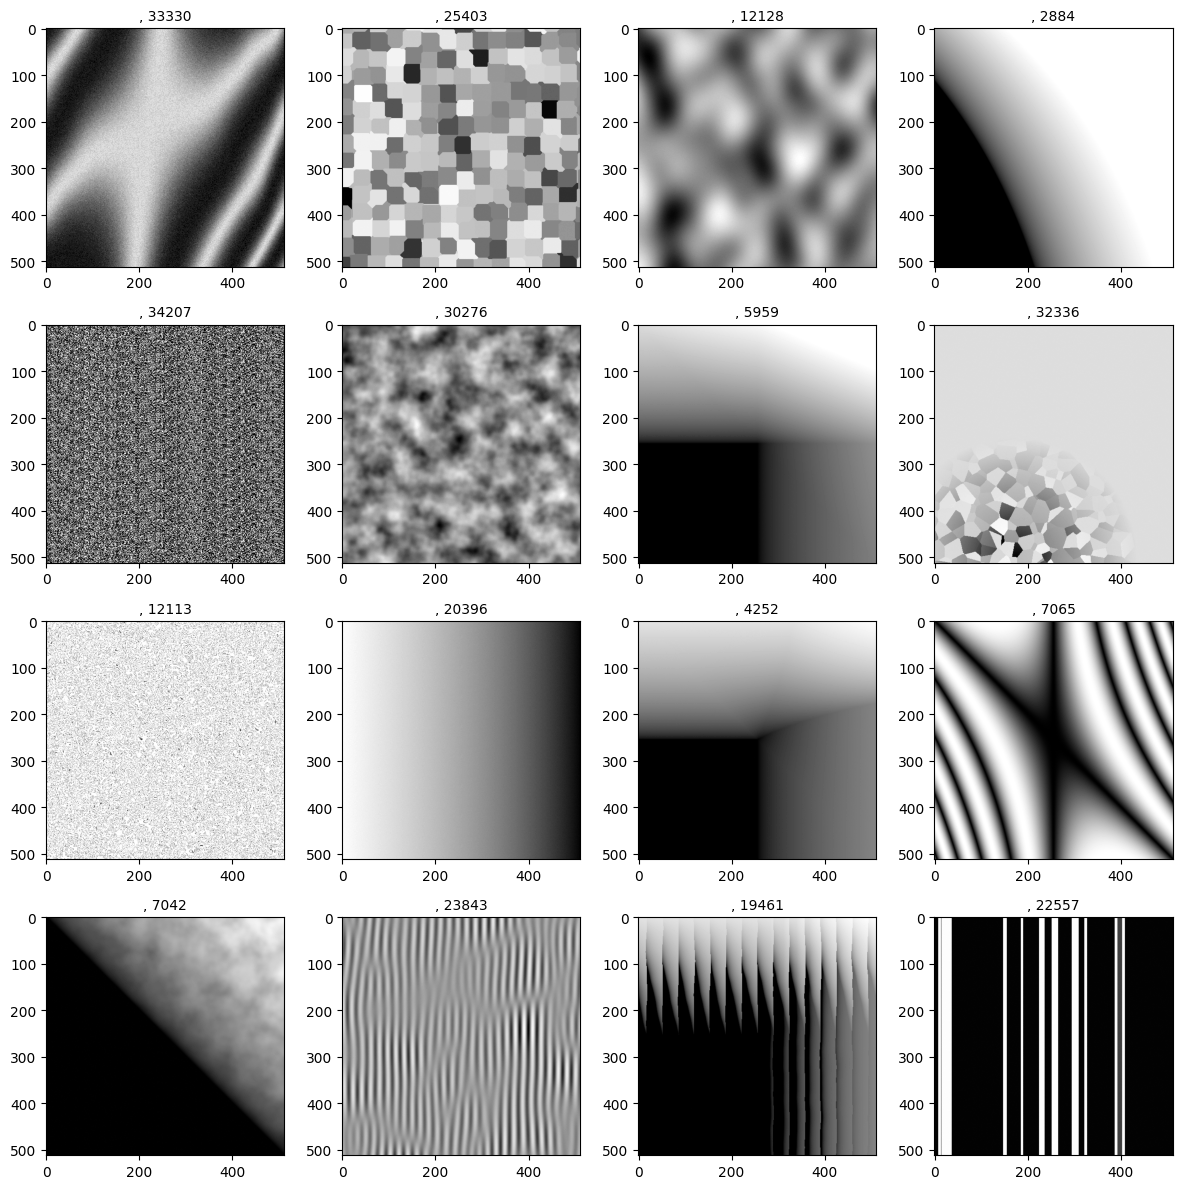

In [116]:
nodes_to_show = np.random.choice(relevant_nodes, min(16, len(relevant_nodes)), replace=False)

# nodes_data = [(node_id, [x for x in db_manager.network.nodes[node_id]['labels'] if 'generation' in x][0]) for node_id in nodes_to_show]
nodes_data = [(node_id, '') for node_id in nodes_to_show]

img_paths = [(os.path.join(images_path, f"{node_id}.png"), f'{text}, {node_id}') for node_id, text in nodes_data]

show_image_grid(img_paths)

In [112]:
nm = db_manager.network_managers['1104']
code = nm.generate_code(with_initialization_code=True)
clipboard.copy(code)

In [21]:
# by a single node - show variations on it

In [117]:
# SEED, NUMERIC, CAT_AND_NUMERIC
edge_show = 'NUMERIC'

cluster_bases = db_manager.get_nodes_with_label(IS_CLUSTER_BASE)
cluster_bases = db_manager.get_nodes_with_edge_type(edge_show)

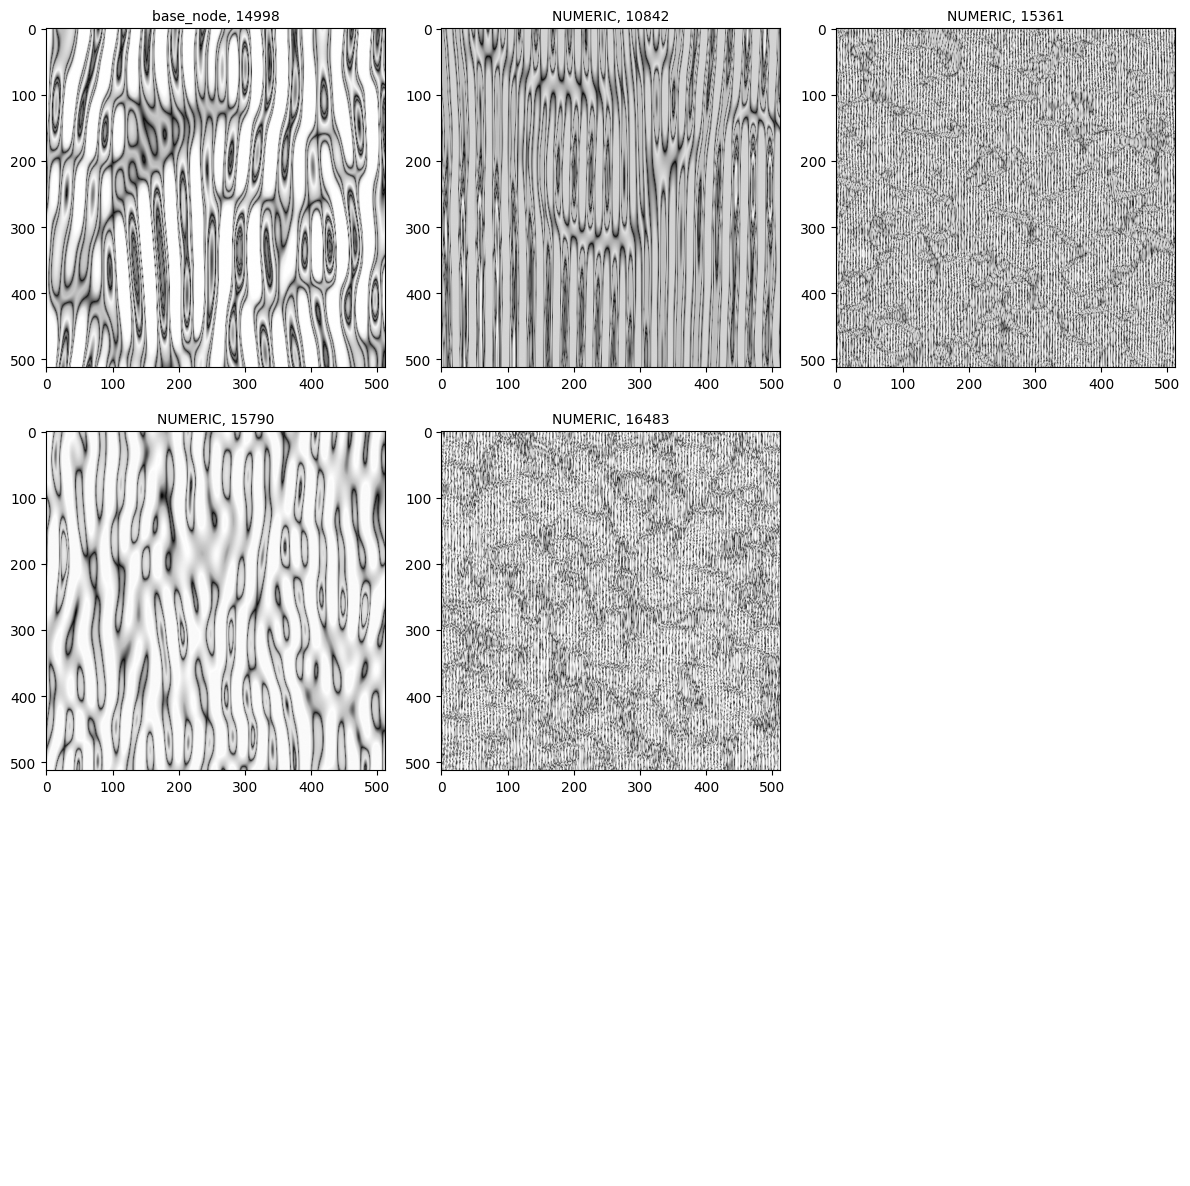

In [121]:
base_node = np.random.choice(cluster_bases)
connected_nodes = db_manager.network.edges(base_node, data=True)

connected_nodes = [x for x in connected_nodes if x[2]['variation_type'] == edge_show]

nodes_data = [(base_node, 'base_node')]
nodes_data.extend([(node_id, d['variation_type']) for _, node_id, d in connected_nodes])
img_paths = [(os.path.join(images_path, f"{node_id}.png"), f'{text}, {node_id}') for node_id, text in nodes_data]

show_image_grid(img_paths)

In [277]:
nm1 = db_manager.network_managers['1050']
nm2 = db_manager.network_managers['1051']

In [278]:
NetworkManager.find_nodes_differences(nm1, nm2)

defaultdict(dict,
            {'Math_1': {'value_0': (0, 1.8),
              'value_1': (0, 5.0),
              'operation': ('ADD', 'ABSOLUTE')}})

In [227]:
code = nm1.generate_code(with_initialization_code=True)
clipboard.copy(code)

# tests that db manager works

In [13]:
for i in range(40):
    clear_output()
    some_node = np.random.choice(list(db_manager.network_managers))
    
    current_node = some_node
    
    orig_copy = db_manager.network_managers[some_node].copy()
    for _ in range(40):
        print(current_node)
        # Get incoming edges for the current node
        outgoing_edges = list(db_manager.network.out_edges(current_node, data=True))
        # Pick a random incoming edge
        edge = outgoing_edges[np.random.randint(len(outgoing_edges))]
        # Move to the new node
        current_node = edge[1]  # The source of the edge becomes the new node
        nm_after =  db_manager.network_managers[current_node]
        variation = VariationDescriptor(VariationType[edge[2]['variation_type']], edge[2]['step'])
        apply_variation(orig_copy, variation)
        assert NetworkManager.compare_networks(orig_copy, nm_after, tuple_list_hack=True)

34415
12344
14312
12344
18684
14312
18684
21892
18684
34747
18684
34747
18684
34747
28353
18684
12344
12345
12346
12344
18684
28353
18684
34747
18684
21892
18684
12344
12345
12346
12344
12343
12344
12343
28405
12343
28405
12343
12344
14312


In [1]:
# verify saved images match what would happen in recreation of the same node

from PIL import Image
from PIL import ImageChops

for i in range(10):
    clear_output(wait=True)
    print(i)
    node = np.random.choice(db_manager.network.nodes)
    nm = db_manager.network_managers[node]
    path = db_manager.make_image_path(node, images_path)
    n1 = Image.open(path)
    generate_image(nm, '/tmp/tmp.png')
    n2 = Image.open('/tmp/tmp.png')
    
    diff = ImageChops.difference(n1, n2)
    assert diff.getbbox() is None

NameError: name 'clear_output' is not defined

In [8]:
db_manager.save()
new_db = DBManager.load(db_path)
assert db_manager.network.nodes(data=True) == new_db.network.nodes(data=True)
a = list(db_manager.network.edges(data=True))
b = list(new_db.network.edges(data=True))
assert compare_dicts(a, b)